# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
import requests
import time

# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather"

# Your API key
api_key = "3943c7885934827047f3b7896c06663d"  

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Define a list of cities to fetch weather data for
cities = ["London", "New York", "Tokyo", "Paris", "Sydney", "Berlin", "Moscow", "Mumbai", "Beijing", "Cairo"]

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city}&appid={api_key}"

    # Log the URL, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)

        # Check if the response is successful
        if response.status_code == 200:
            city_weather = response.json()

            # Parse out the required information
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the City information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })

        else:
            print(f"City {city} not found. Skipping...")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"An error occurred for {city}: {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | London
Processing Record 2 of Set 1 | New York
Processing Record 3 of Set 1 | Tokyo
Processing Record 4 of Set 1 | Paris
Processing Record 5 of Set 1 | Sydney
Processing Record 6 of Set 1 | Berlin
Processing Record 7 of Set 1 | Moscow
Processing Record 8 of Set 1 | Mumbai
Processing Record 9 of Set 1 | Beijing
Processing Record 10 of Set 1 | Cairo
-----------------------------
Data Retrieval Complete
-----------------------------


In [37]:
import pandas as pd

# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          10
Lat           10
Lng           10
Max Temp      10
Humidity      10
Cloudiness    10
Wind Speed    10
Country       10
Date          10
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,London,51.5085,-0.1257,280.93,87,4,2.24,GB,1726115134
1,New York,40.7143,-74.0060,292.71,85,0,2.06,US,1726115739
2,Tokyo,35.6895,139.6917,308.59,60,20,7.20,JP,1726115820
3,Paris,48.8534,2.3488,282.43,88,20,3.09,FR,1726115928
4,Sydney,-33.8679,151.2073,292.78,67,40,12.86,AU,1726115934


In [48]:
import os

# Create the directory 
if not os.path.exists("output_data"):
    os.makedirs("output_data")

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [50]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,London,51.5085,-0.1257,280.93,87,4,2.24,GB,1726115134
1,New York,40.7143,-74.0060,292.71,85,0,2.06,US,1726115739
2,Tokyo,35.6895,139.6917,308.59,60,20,7.20,JP,1726115820
3,Paris,48.8534,2.3488,282.43,88,20,3.09,FR,1726115928
4,Sydney,-33.8679,151.2073,292.78,67,40,12.86,AU,1726115934


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

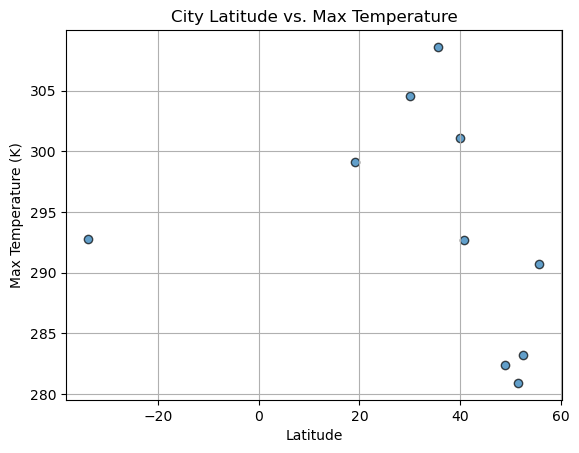

In [52]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
# Add title and labels
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')  # Temperature in Kelvin; change to Celsius or Fahrenheit if needed

# Add grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

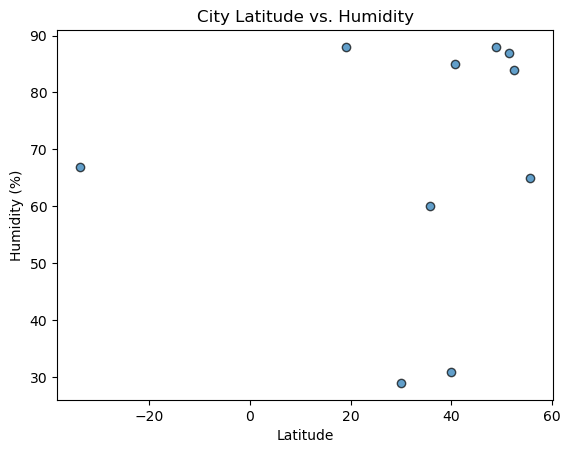

In [56]:
import matplotlib.pyplot as plt

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
# Add title and labels
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')  # Humidity is typically measured in percentage



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

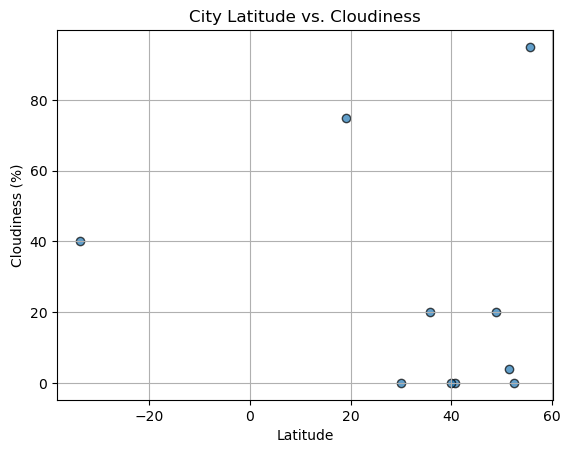

<Figure size 640x480 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')  # Cloudiness is typically measured in percentage

# Add grid
plt.grid(True)

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

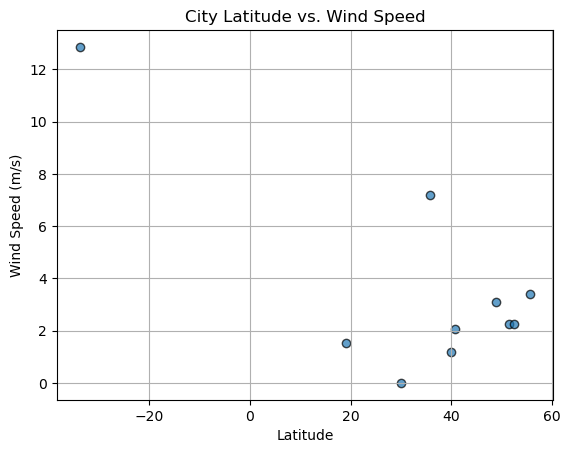

In [66]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)') 

# Add grid
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def create_linear_regression_plot(x_values, y_values, x_label, y_label):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = slope * x_values + intercept
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, color='blue', label='Data Points')
    plt.plot(x_values, regress_values, color='red', label='Regression Line')
    
    # Label the axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Annotate the line equation
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.annotate(line_eq, (0.05, 0.95), fontsize=15, color="red", ha='left', va='top', transform=plt.gca().transAxes)
    
    # Show the r-squared value
    plt.text(0.05, 0.90, f'$R^2$ = {r_value**2:.2f}', fontsize=15, color='black', ha='left', va='top', transform=plt.gca().transAxes)
    
    # Show grid and legend
    plt.grid(True)
    plt.legend()
    
    # Show plot
    plt.show()

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_data = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,London,51.5085,-0.1257,280.93,87,4,2.24,GB,1726115134
1,New York,40.7143,-74.0060,292.71,85,0,2.06,US,1726115739
2,Tokyo,35.6895,139.6917,308.59,60,20,7.20,JP,1726115820
3,Paris,48.8534,2.3488,282.43,88,20,3.09,FR,1726115928
5,Berlin,52.5244,13.4105,283.19,84,0,2.24,DE,1726115944


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0].copy()

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,Sydney,-33.8679,151.2073,292.78,67,40,12.86,AU,1726115934


###  Temperature vs. Latitude Linear Regression Plot

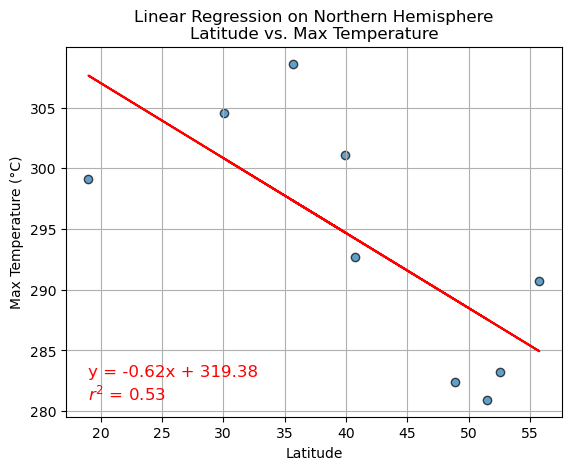

Slope: -0.62
Intercept: 319.38
R-squared: 0.53


In [96]:
# Linear regression on Northern Hemisphere
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Define x and y values
x_values = northern_hemisphere_data['Lat']  # Latitude
y_values = northern_hemisphere_data['Max Temp']  # Max Temperature

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor='black', alpha=0.7)
plt.plot(x_values, regress_values, color='red')

# Add title and labels
plt.title('Linear Regression on Northern Hemisphere\nLatitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')  # Adjust units if necessary

# Add regression line equation and r-squared value
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\n$r^2$ = {r_value**2:.2f}',
             (min(x_values), min(y_values)),
             fontsize=12, color='red')

# Add grid
plt.grid(True)

# Show plot
plt.show()

# Print the linear regression results
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')

C:\Users\pharr\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\pharr\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\pharr\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


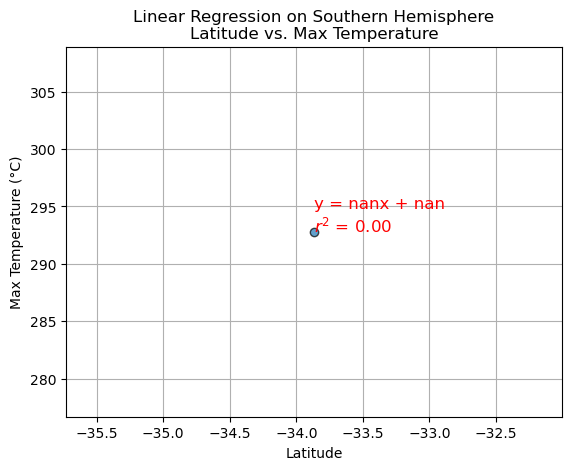

Slope: nan
Intercept: nan
R-squared: 0.00


In [108]:
# Linear regression on Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure you use the correct column names from your DataFrame
x_values = southern_hemisphere_data['Lat']  
y_values = southern_hemisphere_data['Max Temp']  

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line values
regress_values = slope * x_values + intercept

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values, edgecolor='black', alpha=0.7)
plt.plot(x_values, regress_values, color='red')

# Add title and labels
plt.title('Linear Regression on Southern Hemisphere\nLatitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')

# Add regression line equation and r-squared value
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\n$r^2$ = {r_value**2:.2f}',
             (min(x_values), min(y_values)),
             fontsize=12, color='red')

# Add grid
plt.grid(True)

# Show plot
plt.show()

# Print the linear regression results
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

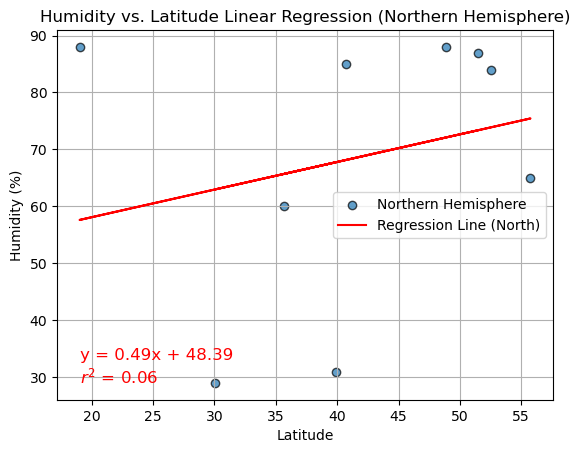

Northern Hemisphere - Slope: 0.49, Intercept: 48.39, R-squared: 0.06


In [110]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_data = city_data_df[city_data_df['Lat'] >= 0].copy()

# Define x and y values for regression: Latitude vs. Humidity
x_values_north = northern_hemisphere_data['Lat']
y_values_north = northern_hemisphere_data['Humidity']

# Perform linear regression for the Northern Hemisphere
(slope_north, intercept_north, r_value_north, p_value_north, std_err_north) = linregress(x_values_north, y_values_north)

# Calculate regression line values for Northern Hemisphere
regress_values_north = slope_north * x_values_north + intercept_north

# Plot the scatter plot and regression line for Northern Hemisphere
plt.scatter(x_values_north, y_values_north, edgecolor='black', alpha=0.7, label='Northern Hemisphere')
plt.plot(x_values_north, regress_values_north, color='red', label='Regression Line (North)')

# Add title and labels
plt.title('Humidity vs. Latitude Linear Regression (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Add regression line equation and r-squared value
plt.annotate(f'y = {slope_north:.2f}x + {intercept_north:.2f}\n$r^2$ = {r_value_north**2:.2f}',
             (min(x_values_north), min(y_values_north)),
             fontsize=12, color='red')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()

# Print the linear regression results for Northern Hemisphere
print(f'Northern Hemisphere - Slope: {slope_north:.2f}, Intercept: {intercept_north:.2f}, R-squared: {r_value_north**2:.2f}')


C:\Users\pharr\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\pharr\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\pharr\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


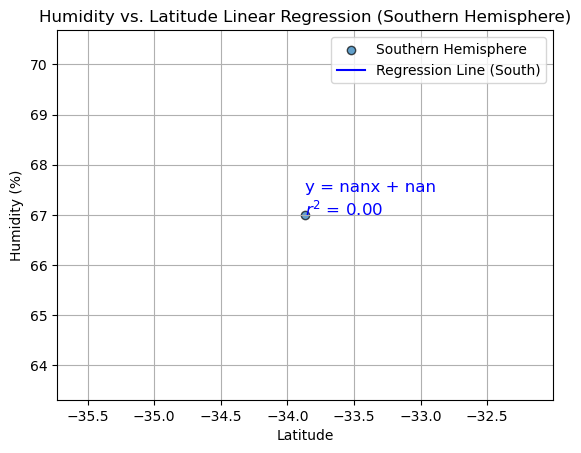

Southern Hemisphere - Slope: nan, Intercept: nan, R-squared: 0.00


In [114]:
# Southern Hemisphere
# Filter Southern Hemisphere data (Latitude < 0)
southern_hemisphere_data = city_data_df[city_data_df['Lat'] < 0].copy()

# Define x and y values for regression: Latitude vs. Humidity
x_values_south = southern_hemisphere_data['Lat']
y_values_south = southern_hemisphere_data['Humidity']

# Perform linear regression for the Southern Hemisphere
(slope_south, intercept_south, r_value_south, p_value_south, std_err_south) = linregress(x_values_south, y_values_south)

# Calculate regression line values for Southern Hemisphere
regress_values_south = slope_south * x_values_south + intercept_south

# Plot the scatter plot and regression line for Southern Hemisphere
plt.scatter(x_values_south, y_values_south, edgecolor='black', alpha=0.7, label='Southern Hemisphere')
plt.plot(x_values_south, regress_values_south, color='blue', label='Regression Line (South)')

# Add title and labels
plt.title('Humidity vs. Latitude Linear Regression (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Add regression line equation and r-squared value
plt.annotate(f'y = {slope_south:.2f}x + {intercept_south:.2f}\n$r^2$ = {r_value_south**2:.2f}',
             (min(x_values_south), min(y_values_south)),
             fontsize=12, color='blue')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()

# Print the linear regression results for Southern Hemisphere
print(f'Southern Hemisphere - Slope: {slope_south:.2f}, Intercept: {intercept_south:.2f}, R-squared: {r_value_south**2:.2f}')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

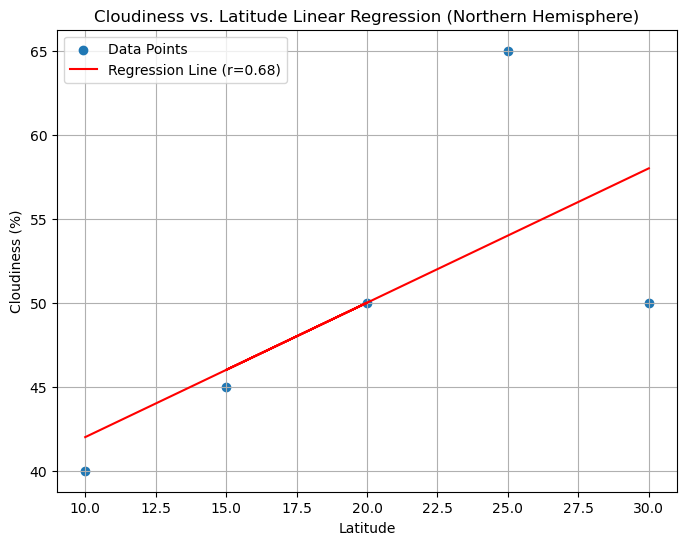

In [118]:
# Northern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

ata = {
    'Latitude': [10, 20, -10, -20, 15, -15, 25, -25, 30, -30],
    'Cloudiness': [40, 50, 60, 70, 45, 55, 65, 75, 50, 80]
}
df = pd.DataFrame(data)

# Separate data into Northern and Southern Hemispheres
northern_hemisphere = df[df['Latitude'] >= 0]

# Function to perform linear regression and plot
def plot_regression(hemisphere_data, hemisphere_name):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(hemisphere_data['Latitude'], hemisphere_data['Cloudiness'])

# Generate regression line
    regression_line = slope * hemisphere_data['Latitude'] + intercept
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(hemisphere_data['Latitude'], hemisphere_data['Cloudiness'], label='Data Points')
    plt.plot(hemisphere_data['Latitude'], regression_line, color='red', label=f'Regression Line (r={r_value:.2f})')
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness (%)')
    plt.title(f'Cloudiness vs. Latitude Linear Regression ({hemisphere_name})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for Northern Hemisphere
plot_regression(northern_hemisphere, 'Northern Hemisphere')



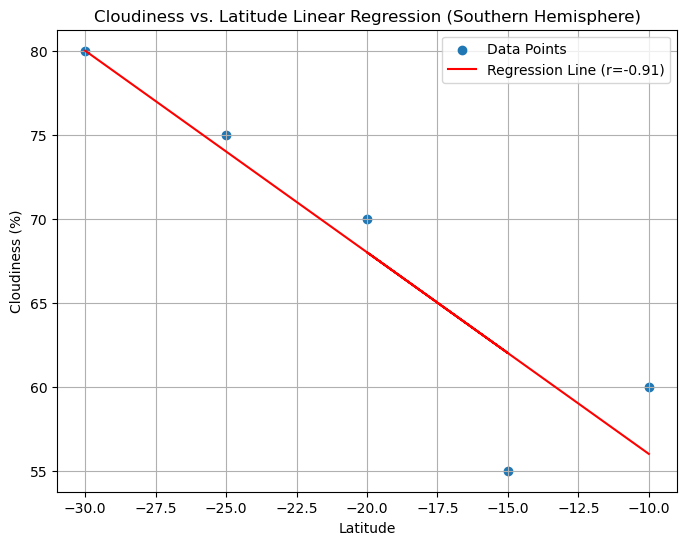

In [120]:
# Southern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress



data = {
    'Latitude': [10, 20, -10, -20, 15, -15, 25, -25, 30, -30],
    'Cloudiness': [40, 50, 60, 70, 45, 55, 65, 75, 50, 80]
}
df = pd.DataFrame(data)

# Separate data into Northern and Southern Hemispheres
southern_hemisphere = df[df['Latitude'] < 0]

# Function to perform linear regression and plot
def plot_regression(hemisphere_data, hemisphere_name):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(hemisphere_data['Latitude'], hemisphere_data['Cloudiness'])
    
    # Generate regression line
    regression_line = slope * hemisphere_data['Latitude'] + intercept
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(hemisphere_data['Latitude'], hemisphere_data['Cloudiness'], label='Data Points')
    plt.plot(hemisphere_data['Latitude'], regression_line, color='red', label=f'Regression Line (r={r_value:.2f})')
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness (%)')
    plt.title(f'Cloudiness vs. Latitude Linear Regression ({hemisphere_name})')
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot for Southern Hemisphere
plot_regression(southern_hemisphere, 'Southern Hemisphere')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

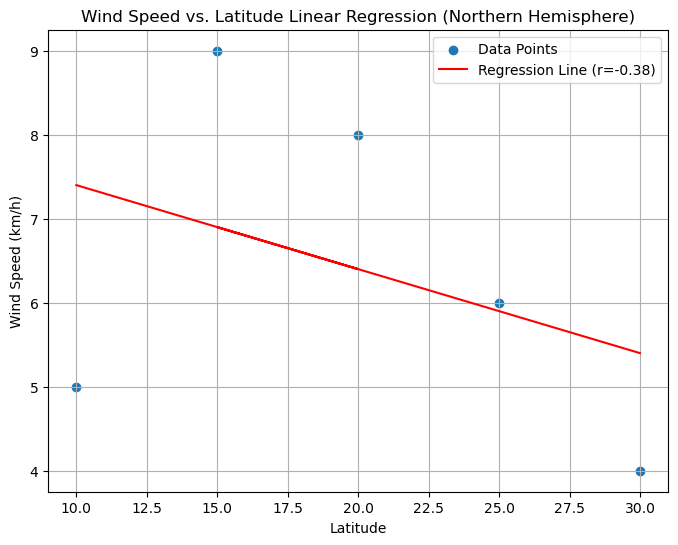

In [122]:
# Northern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


data = {
    'Latitude': [10, 20, 15, 25, 30],  
    'Wind Speed': [5, 8, 9, 6, 4]     
}
df = pd.DataFrame(data)

# Filter data for the Northern Hemisphere
northern_hemisphere = df[df['Latitude'] >= 0]

# Function to perform linear regression and plot for the Northern Hemisphere
def plot_regression(hemisphere_data, hemisphere_name):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(hemisphere_data['Latitude'], hemisphere_data['Wind Speed'])
    
    # Generate regression line
    regression_line = slope * hemisphere_data['Latitude'] + intercept
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(hemisphere_data['Latitude'], hemisphere_data['Wind Speed'], label='Data Points')
    plt.plot(hemisphere_data['Latitude'], regression_line, color='red', label=f'Regression Line (r={r_value:.2f})')
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed (km/h)')
    plt.title(f'Wind Speed vs. Latitude Linear Regression ({hemisphere_name})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for Northern Hemisphere
plot_regression(northern_hemisphere, 'Northern Hemisphere')


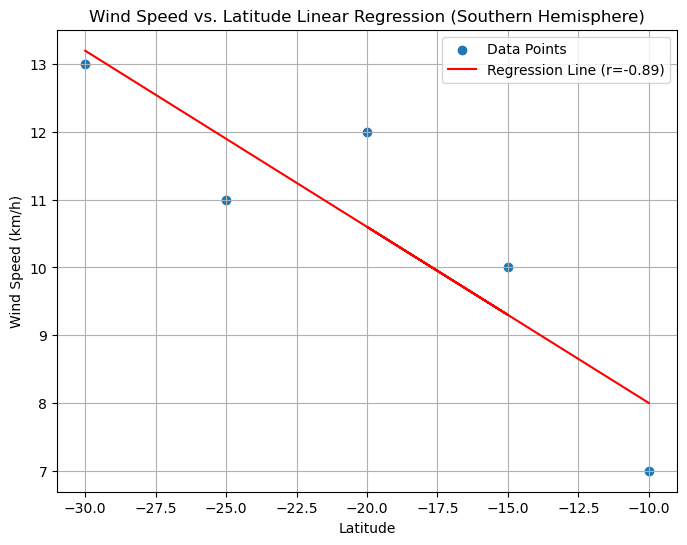

In [124]:
# Southern Hemisphere
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


data = {
    'Latitude': [-10, -20, -15, -25, -30],  
    'Wind Speed': [7, 12, 10, 11, 13]     
}
df = pd.DataFrame(data)

# Filter data for the Southern Hemisphere
southern_hemisphere = df[df['Latitude'] < 0]

# Function to perform linear regression and plot for the Southern Hemisphere
def plot_regression(hemisphere_data, hemisphere_name):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(hemisphere_data['Latitude'], hemisphere_data['Wind Speed'])
    
    # Generate regression line
    regression_line = slope * hemisphere_data['Latitude'] + intercept
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(hemisphere_data['Latitude'], hemisphere_data['Wind Speed'], label='Data Points')
    plt.plot(hemisphere_data['Latitude'], regression_line, color='red', label=f'Regression Line (r={r_value:.2f})')
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed (km/h)')
    plt.title(f'Wind Speed vs. Latitude Linear Regression ({hemisphere_name})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for Southern Hemisphere
plot_regression(southern_hemisphere, 'Southern Hemisphere')


**Discussion about the linear relationship:** YOUR RESPONSE HERE